# Anime Recommendation System

#**Starter Code**

##Loading Package

In [2]:
# General
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import statistics
import random

##Loading Data

In [3]:
anime_df = pd.read_csv("https://raw.githubusercontent.com/Yinaluo/ML-FinalProject-Anime/main/anime.csv")
url = "https://github.com/Yinaluo/ML-FinalProject-Anime/blob/fef49221913a1adab7c818f8cf6abd277d7c3e03/rating.csv.zip?raw=true"
rating_df = pd.read_csv(url, compression='zip')

#Data Overview

##Data summary

In [4]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
anime_df.shape

(12294, 7)

In [7]:
# checking if there are any null values in both the dataframes
anime_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [8]:
anime_df['type'].value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

In [9]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [10]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [11]:
rating_df['rating'].value_counts()

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

In [12]:
rating_df.shape

(7813737, 3)

## Merging the data

In [13]:
df = pd.merge(anime_df,rating_df,on='anime_id',suffixes= ['', '_user'])

In [14]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813727 entries, 0 to 7813726
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   anime_id     int64  
 1   name         object 
 2   genre        object 
 3   type         object 
 4   episodes     object 
 5   rating       float64
 6   members      int64  
 7   user_id      int64  
 8   rating_user  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 596.1+ MB


In [16]:
df.shape

(7813727, 9)

## Handle with NaN Values

In [17]:
df["rating_user"].replace({-1: np.nan}, inplace=True)
df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN


In [18]:
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

anime_id       0
name           0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
rating_user    0
dtype: int64

# Exploratory Data Analysis
 

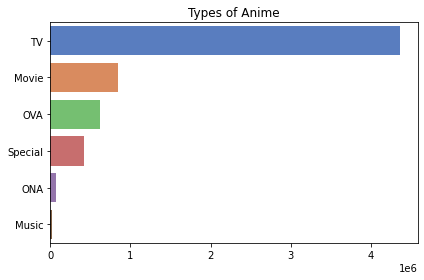

In [19]:
type_count = df['type'].value_counts()

sns.barplot(x=type_count.values,
            y=type_count.index,
            palette='muted').set_title('Types of Anime')

plt.tight_layout()
plt.show()

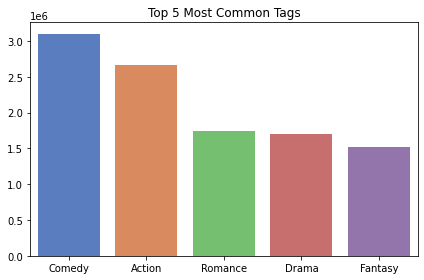

In [20]:
all_words = ' '.join(df.genre)
words = all_words.split()
words = [word[:-1] for word in words]

word_counts = Counter(words)
top_words = [word for word, count in word_counts.most_common(5)]
word_counts = [count for word, count in word_counts.most_common(5)]


sns.barplot(x=top_words, y=word_counts, palette='muted').set_title('Top 5 Most Common Tags')
plt.tight_layout()
plt.show()

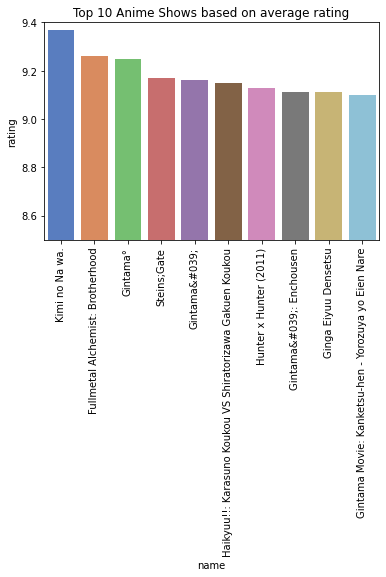

In [21]:
top_anime = df.sort_values(by = 'rating',ascending = False)
top_anime.drop_duplicates(subset=['name'], inplace=True)
top_anime = top_anime[['name', 'rating']].sort_values(by = 'rating',ascending = False).head(10)

sns.barplot(x=top_anime.name, y=top_anime.rating, palette='muted').set_title('Top 10 Anime Shows based on average rating')

plt.xticks(rotation=90)

plt.ylim(8.5,9.4)
plt.show()

In [22]:
ratings_per_user = df.groupby('user_id')['rating'].count()
m = statistics.mean(ratings_per_user.tolist())
print(f"The rating number per user is {round(m)}")

The rating number per user is 91


<AxesSubplot:>

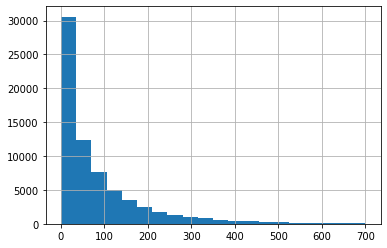

In [23]:
ratings_per_user.hist(bins=20, range=(0,700))

In [24]:
df.shape

(6337146, 9)

In [25]:
df['rating'].value_counts()

8.06    71090
8.17    69037
7.81    67284
7.87    64402
7.95    64058
        ...  
2.55        1
3.38        1
3.67        1
4.18        1
3.20        1
Name: rating, Length: 574, dtype: int64

In [26]:
df['user_id'].value_counts()

42635    3747
53698    2905
57620    2689
59643    2632
51693    2620
         ... 
41324       1
11199       1
19041       1
26082       1
62930       1
Name: user_id, Length: 69600, dtype: int64

In [27]:
df['name'].value_counts()

Death Note                                            34226
Sword Art Online                                      26310
Shingeki no Kyojin                                    25290
Code Geass: Hangyaku no Lelouch                       24126
Angel Beats!                                          23565
                                                      ...  
Omakase! Miracle Cat-dan                                  1
Omakase Scrappers                                         1
Okore!! Nonkuro                                           1
Okon Joururi                                              1
Violence Gekiga Shin David no Hoshi: Inma Densetsu        1
Name: name, Length: 9892, dtype: int64

In [28]:
df = df.groupby('user_id').filter(lambda x: len(x) >= 200)

In [29]:
df = df.groupby('name').filter(lambda x: len(x) >= 300)

In [30]:
df.shape

(2788443, 9)

In [31]:
df['genre'].value_counts()

Comedy, School, Slice of Life                           28508
Comedy, Slice of Life                                   24241
Comedy, School, Shounen, Slice of Life                  20279
Comedy, Seinen, Slice of Life                           20068
Comedy, Romance, School, Slice of Life                  18863
                                                        ...  
Harem, School, Shoujo                                     304
Shounen, Sports, Super Power                              303
Action, Drama, Mecha, Psychological, Romance, Sci-Fi      302
Action, Adventure, Martial Arts, Sci-Fi                   301
Adventure, Drama, Magic, Sci-Fi                           301
Name: genre, Length: 1301, dtype: int64

In [32]:
random.seed(66)
df_new = df.sample(frac=.03)

In [33]:
df_new.shape

(83653, 9)

# Model Building

In [34]:
df_new.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
5145748,13659,Ore no Imouto ga Konnani Kawaii Wake ga Nai.,"Comedy, Seinen, Slice of Life",TV,13,7.43,194791,45342,6.0
2580889,8525,Kami nomi zo Shiru Sekai,"Comedy, Harem, Romance, Shounen, Supernatural",TV,12,7.95,284846,65125,6.0
1136158,2966,Ookami to Koushinryou,"Adventure, Fantasy, Historical, Romance",TV,13,8.37,334932,38307,6.0
5776847,1498,Black Blood Brothers,"Action, Comedy, Fantasy, Shounen, Supernatural...",TV,12,7.28,68626,59745,6.0
4553715,906,Dragon Ball Z Movie 13: Ryuuken Bakuhatsu!! Go...,"Adventure, Comedy, Fantasy, Sci-Fi, Shounen",Movie,1,7.54,50607,58233,8.0


In [39]:
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise import KNNBasic, KNNWithMeans
from surprise import SVD, SVDpp
from surprise import CoClustering

In [40]:
reader = Reader(rating_scale=(1, 10))
ds = Dataset.load_from_df(df_new[['user_id', 'anime_id', 'rating_user']], reader)
trainset, testset = train_test_split(ds, test_size=0.2, random_state=66)

In [41]:
print(trainset.n_users)
print(trainset.n_items)
print(len(testset))
print(testset[0])

8676
2305
16731
(35586, 25517, 9.0)


##Model Fitting

Performing User-User based collaborative filtering using surprise
We will be using KNN, KNN with means and KNNBaselines method to build models
Similarity measures used Cosine and Pearson
Evaluation metric used RMSE

###user-based KNN


In [42]:
sim_ucos = {'name':'cosine','user_based': True}

In [43]:
kbasic_u = KNNBasic(sim_options=sim_ucos)
kbasic_u.fit(trainset)
pre_kbu = kbasic_u.test(testset)
print(accuracy.rmse(pre_kbu))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.6882
1.6881543138847739


In [44]:
# fiting the KNN with means model on train data 
kmeans_u = knns.KNNWithMeans(sim_options=sim_ucos)
kmeans_u.fit(trainset)
pre_kmu = kmeans_u.test(testset)
print(accuracy.rmse(pre_kmu))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.4704
1.4703868944688723


In [46]:
# evaluating using rmse
acc_m = accuracy.rmse(pre_kmu)
print("KNNWithMeans accuracy with cosine similarity", acc_m)

RMSE: 1.4704
KNNWithMeans accuracy with cosine similarity 1.4703868944688723


###item_based KNN

In [47]:
sim_icos = {'name':'cosine','user_based': False}

In [48]:
kbasic_i = KNNBasic(sim_options=sim_icos)
kbasic_i.fit(trainset)
pre_kbi = kbasic_i.test(testset)
print(accuracy.rmse(pre_kbi))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.6149
1.6149409683547553


In [49]:
kmeans_i = knns.KNNWithMeans(sim_options=sim_icos)
kmeans_i.fit(trainset)
pre_kmi = kmeans_u.test(testset)
print(accuracy.rmse(pre_kmi))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.4704
1.4703868944688723


###SVD

In [50]:
algo: SVD = SVD()

In [51]:
# Train the algorithm on the trainset
algo.fit(trainset)

In [52]:
# Calculate RMSE for test dataset
pre_svd = algo.test(testset)
accuracy.rmse(pre_svd)

RMSE: 1.2914


1.291445136165246

### SVDPP

In [53]:
algo: SVDpp = SVDpp()

In [54]:
# Train the algorithm on the trainset
algo.fit(trainset)

In [55]:
# Calculate RMSE for test dataset
pre_svdpp = algo.test(testset)
accuracy.rmse(pre_svdpp)

RMSE: 1.2804


1.2803789729986066

### CoClustering

In [56]:
algo: CoClustering = CoClustering()

In [57]:
# Train the algorithm on the trainset
algo.fit(trainset)

In [58]:
# Calculate RMSE for test dataset
pre_cc = algo.test(testset)
accuracy.rmse(pre_cc)

RMSE: 1.3574


1.3574439143336128

## Model Comparison

In [59]:
results = { 'Algorithm': ['KBU', 'KMU', 'KBI', 'KMI', 'SVD', 'SVDpp', 'CC'],
    'RMSE': [accuracy.rmse(pre_kbu), accuracy.rmse(pre_kmu), accuracy.rmse(pre_kbi), accuracy.rmse(pre_kmi), accuracy.rmse(pre_svd), accuracy.rmse(pre_svdpp), accuracy.rmse(pre_cc)]
}
results = pd.DataFrame(results)

RMSE: 1.6882
RMSE: 1.4704
RMSE: 1.6149
RMSE: 1.4704
RMSE: 1.2914
RMSE: 1.2804
RMSE: 1.3574


In [60]:
print(results)

  Algorithm      RMSE
0       KBU  1.688154
1       KMU  1.470387
2       KBI  1.614941
3       KMI  1.470387
4       SVD  1.291445
5     SVDpp  1.280379
6        CC  1.357444


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


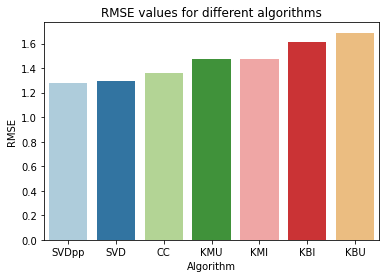

In [61]:
results_sorted = results.sort_values(by='RMSE')
palette=sns.color_palette("Paired")
sns.barplot(results_sorted['Algorithm'], results_sorted['RMSE'],palette=palette)
plt.title('RMSE values for different algorithms')
plt.xlabel('Algorithm')
plt.ylabel('RMSE')
plt.show()

##Tuning Parameter

In [ ]:
from surprise.model_selection import GridSearchCV

In [ ]:
#SVDPP
param_grid = {'n_factors': [20, 50], 
              'n_epochs': [100, 200, 500], 
              'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}

algo = SVDpp
gs = GridSearchCV(algo, param_grid, measures=['rmse', "mae"], cv=3)
gs.fit(ds)

# Print the best RMSE score and the best hyperparameters
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])


1.2662155855706942
{'n_factors': 20, 'n_epochs': 200, 'lr_all': 0.002, 'reg_all': 0.4}


In [ ]:
algo_cv = SVDpp(n_factors=20, n_epochs=200, lr_all=0.002, reg_all=0.4)
algo_cv.fit(trainset)

In [ ]:
accuracy.rmse(algo_cv.test(testset))

RMSE: 1.2575


1.2574635468703703

##Recommendation System Test

In [ ]:
pred = algo_cv.test(testset)

In [ ]:
from collections import defaultdict

In [ ]:
ani = anime_df[['anime_id','name']]
ani.head()

,anime_id,name
0,32281,Kimi no Na wa.
1,5114,Fullmetal Alchemist: Brotherhood
2,28977,Gintama°
3,9253,Steins;Gate
4,9969,Gintama&#039;


In [ ]:
ani_list = ani.set_index('anime_id').T.to_dict('list')

In [ ]:
show = []
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.
    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.
    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n(pred, n=5)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    #print(uid, [iid for (iid, _) in user_ratings])
    result = (uid, [ani_list[iid] for (iid, _) in user_ratings])
    show.append(result)

In [ ]:
topn = get_top_n(pred,n=10)

In [ ]:
pd.set_option('display.max_colwidth',-1)
df3 = pd.DataFrame(show,columns=[['userID','The animes that recommended to user']])
df3.head(10)

<ipython-input-143-ea522fa8c485>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


,userID,The animes that recommended to user
0,39909,"[[Durarara!!x2 Shou], [Shiki Specials], [Kyoukai no Kanata: Shinonome]]"
1,5380,"[[Yuru Yuri], [Sengoku Basara]]"
2,20793,[[Ghost in the Shell: Stand Alone Complex 2nd GIG]]
3,61620,[[Accel World]]
4,42246,"[[K-On! Movie], [Chihayafuru], [Kanon (2006)]]"
5,53958,"[[Black Lagoon], [Toaru Kagaku no Railgun]]"
6,46046,"[[Hotarubi no Mori e], [Denpa Onna to Seishun Otoko]]"
7,53888,"[[Mahou Shoujo Madoka★Magica Movie 3: Hangyaku no Monogatari], [Soul Eater], [Sekaiichi Hatsukoi], [Hellsing], [Fruits Basket]]"
8,61498,[[Love Hina]]
9,11213,"[[Tengen Toppa Gurren Lagann], [Summer Wars]]"


In [ ]:
df_custom = pd.DataFrame(columns=['User','Name', 'Rating'])
key_list = list(user_extras.keys())
for i in range(initial_max+1, max_user_id+2) :
    reco_list = top_n[i]
    for j in reco_list:
        anime = df_animes.loc[df_animes['MAL_ID'] == j[0]]
        df_custom = df_custom.append({
             "Name": anime["Name"].values[0],
             "Rating":  j[1],
             "User": key_list[i-initial_max-1]
              }, ignore_index=True)
df_custom = df_custom.sort_values("User")
df_custom

NameError: ignored

In [ ]:
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

def get_user_top_n(predictions, user_id, n=10):

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        if uid == user_id:
            top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [ ]:
top_n = get_top_n(pred, n=10)
df_animes = pd.read_csv("anime.csv" , usecols=['MAL_ID', 'Name'])

ValueError: ignored

In [ ]:
# get a user
user_id = df.user_id.iloc[3000]

# get all anime's
anime_ids = df.anime_id.unique()

# create a user data frame to predict ratings
user_to_predict = {'user_id': [user_id] * len(anime_ids),
                   'anime_id': anime_ids,
                   'rating_x': [0] * len(anime_ids)}
predict_data_df = pd.DataFrame(user_to_predict)

# create data object from dataframe
reader = Reader(rating_scale=(1, 10))
predict_data = Dataset.load_from_df(predict_data_df, reader)

# predict ratings
testset = predict_data.build_full_trainset().build_testset()
pred = algo_cv.test(testset)

# get top 10
top_n = get_top_n(pred, n=10)

for uid, user_ratings in top_n.items():
  print(f"User id: {uid}\n")
  print(f"Recomandations (Users anime are not included):")
  names = [df.loc[df.anime_id == iid,
                       'name'].iloc[0] for (iid, _) in user_ratings]
  for i in names:
    print(i)

print(f"\nUsers Anime's:")
names = df[df.user_id==user_id].sort_values(
    by='rating', ascending=False).name.to_list()
for i in names[:10]:
    print(i)

User id: 27247

Recomandations (Users anime are not included):
Ginga Eiyuu Densetsu
Gintama&#039;
Kimi no Na wa.
Gintama
Fullmetal Alchemist: Brotherhood
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare
Major S2
Hunter x Hunter (2011)
Clannad: After Story
Gintama°

Users Anime's:
Fullmetal Alchemist: Brotherhood
Steins;Gate
Gintama&#039;
Hunter x Hunter (2011)
Gintama&#039;: Enchousen
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare
Gintama
Code Geass: Hangyaku no Lelouch R2
Sen to Chihiro no Kamikakushi
Code Geass: Hangyaku no Lelouch
